In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.ma.core import size
from statsmodels.tsa.stattools import adfuller

In [4]:
data = pd.read_csv('../data.csv')
print(data)

      Account Name               Date & Time     Activity Details  \
0   Dining Dollars  January 25, 2025,11:53AM  Sim - GibsonDining1   
1   Dining Dollars   January 24, 2025,9:54AM           Sim - SBX1   
2   Dining Dollars   January 24, 2025,8:22AM  Sim - GibsonDining1   
3   Dining Dollars   January 23, 2025,6:08PM  Sim - GibsonDining1   
4   Dining Dollars  January 23, 2025,10:53AM           Sim - SBX1   
5   Dining Dollars   January 23, 2025,7:38AM  Sim - GibsonDining1   
6   Dining Dollars  January 22, 2025,10:32AM           Sim - SBX1   
7   Dining Dollars   January 22, 2025,8:16AM  Sim - GibsonDining1   
8   Dining Dollars   January 21, 2025,6:11PM  Sim - GibsonDining1   
9   Dining Dollars  January 21, 2025,12:03PM      Sim - Gorillas3   
10  Dining Dollars   January 21, 2025,9:06AM           Sim - SBX1   

    Amount ($ / Meals)  
0                 9.50  
1                 2.65  
2                 9.00  
3                 1.00  
4                 2.65  
5                 9.0

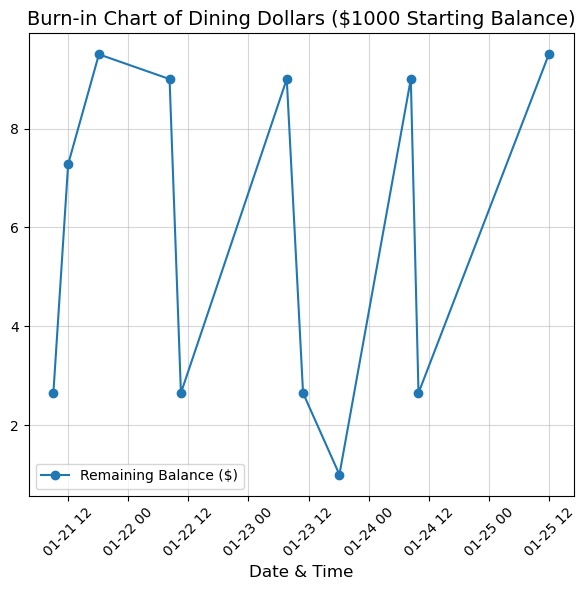

In [7]:
# Load data into a DataFrame
df = pd.DataFrame(data)

# Convert "Date & Time" to datetime
df["Date & Time"] = pd.to_datetime(df["Date & Time"], format="%B %d, %Y,%I:%M%p")

# Sort by date and time
df = df.sort_values(by="Date & Time")

# Calculate cumulative spending
df["Cumulative Spending"] = df["Amount ($ / Meals)"].cumsum()
df["Remaining Balance"] = 1000 - df["Cumulative Spending"]

# Plot burn-in chart
plt.figure(figsize=(6, 6))
plt.plot(df["Date & Time"], df["Amount ($ / Meals)"], marker="o", label="Remaining Balance ($)")
plt.title("Burn-in Chart of Dining Dollars ($1000 Starting Balance)", fontsize=14)
plt.xlabel("Date & Time", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
result = adfuller( df["Amount ($ / Meals)"])

print(f'ADF statistics : {result[0]}')
print(f'p-value {result[1]}')
print('critical values: ')
for key, value in result[4].items():
    print(f"\t{key} {value}")

ADF statistics : -4.038316016841321
p-value 0.0012226458858651873
critical values: 
	1% -4.331573
	5% -3.23295
	10% -2.7487


In [9]:
if result[1] < 0.05:
    print("reject the null hypothesis - the time series doesn't have unit root, i.e it is stationary")
else:
    print("fail to reject the null hypothesis - i.e it is non-stationary")

reject the null hypothesis - the time series doesn't have unit root, i.e it is stationary
